<a href="https://colab.research.google.com/github/hjdeck/Cyberbullying-Classification/blob/main/MNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Naive Bayes Model


In [21]:
import pandas as pd

In [22]:
tweets = pd.read_csv('cyberbullying_tweets.csv')
tweets.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## Text Preprocessing

In [23]:
import re
from wordcloud import STOPWORDS
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
# Text Cleaning
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [25]:
# preprocessed data
tweets['tweet_text'] = tweets['tweet_text'].apply(clean_text)
tweets['tweet_text'] = tweets['tweet_text'].apply(lemmatize_words)
tweets.head()

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious,not_cyberbullying
1,aussietv white theblock imacelebrityau today s...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thank head concern another angry dude tw...,not_cyberbullying
4,isis account pretend kurdish account islam lie,not_cyberbullying


## Training Model

In [7]:
from sklearn.model_selection import train_test_split          # splitting training/testing data
from sklearn.feature_extraction.text import TfidfVectorizer   # convert raw docs to matrix of TF-IDF features
from sklearn.naive_bayes import MultinomialNB                 # ultinomial classifier
from sklearn.pipeline import make_pipeline                    # pipline transforms to classifier

In [26]:
# split train/test datasets
train, test = train_test_split(tweets, test_size = 0.3, random_state = 1)

# create MNB model
MNB_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [27]:
# fit model to train data
MNB_model.fit(train.tweet_text, train.cyberbullying_type)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

## Model Evaluation


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [35]:
# evalute fitted model on test data
MNB_labels = MNB_model.predict(test.tweet_text)

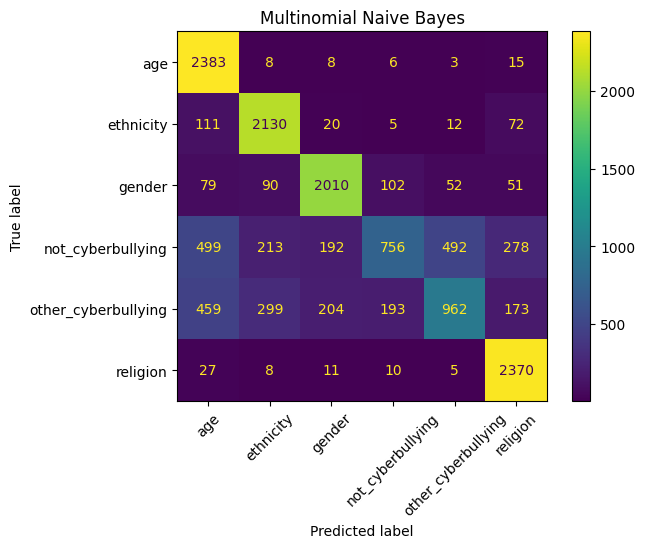

In [40]:
MNB_cm = confusion_matrix(test.cyberbullying_type, MNB_labels, labels = MNB_model.classes_)
MNB_cmd = ConfusionMatrixDisplay(confusion_matrix = MNB_cm, display_labels = MNB_model.classes_)
MNB_cmd.plot(xticks_rotation = 45)
MNB_cmd.ax_.set(title = 'Multinomial Naive Bayes')
plt.savefig('MNB_confusionmat.png', bbox_inches='tight')

In [39]:
print(classification_report(test.cyberbullying_type, MNB_labels, 
                            target_names = tweets['cyberbullying_type'].unique()))

                     precision    recall  f1-score   support

  not_cyberbullying       0.67      0.98      0.80      2423
             gender       0.78      0.91      0.84      2350
           religion       0.82      0.84      0.83      2384
other_cyberbullying       0.71      0.31      0.43      2430
                age       0.63      0.42      0.50      2290
          ethnicity       0.80      0.97      0.88      2431

           accuracy                           0.74     14308
          macro avg       0.73      0.74      0.71     14308
       weighted avg       0.73      0.74      0.71     14308

